In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

## Dataset lowvariance + correlation filter

In [2]:
lc_dataset = pd.read_csv("/media/kmdr7/Seagate/TA/DATASETS/DatasetSampled-15-20.csv")
lc_clean_dataset = lc_dataset.drop(columns=["Label"])
lc_label = lc_dataset["Label"]
lc_dataset

,Protocol,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,5,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,1.551388e+15,0.0,1.551388e+15,1.551388e+15,Malicious
1,6,5,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,1.551389e+15,0.0,1.551389e+15,1.551389e+15,Malicious
2,6,5,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,1.551390e+15,0.0,1.551390e+15,1.551390e+15,Malicious
3,6,259,6,0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,1.551388e+15,0.0,1.551388e+15,1.551388e+15,Malicious
4,6,255,4,0,0.0,0.0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,1.551388e+15,0.0,1.551388e+15,1.551388e+15,Malicious
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59482,17,93506,1,1,33.0,49.0,33.0,33.0,33.0,0.0,...,8,0.0,0.0,0.0,0.0,1.539340e+15,0.0,1.539340e+15,1.539340e+15,Benign
59483,17,129828,1,1,48.0,48.0,48.0,48.0,48.0,0.0,...,8,0.0,0.0,0.0,0.0,1.539328e+15,0.0,1.539328e+15,1.539328e+15,Benign
59484,17,497,1,1,46.0,110.0,46.0,46.0,46.0,0.0,...,8,0.0,0.0,0.0,0.0,1.539291e+15,0.0,1.539291e+15,1.539291e+15,Benign
59485,17,93431,1,1,33.0,49.0,33.0,33.0,33.0,0.0,...,8,0.0,0.0,0.0,0.0,1.539331e+15,0.0,1.539331e+15,1.539331e+15,Benign


## Dataset PCA

In [7]:
pca_dataset = pd.read_csv("/media/kmdr7/Seagate/DATASETS/IOT-23/Merged/04. Feature Selection/pca_dataset.csv")
pca_clean_dataset = pca_dataset.drop(columns=["Label"])
pca_label = pca_dataset["Label"]
pca_dataset

,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,Label
0,0.147808,-0.514771,0.286697,-0.137553,0.913494,0.855905,0.273484,-0.479864,0.440577,Malware
1,-1.022914,-0.885687,0.002199,-0.213661,0.404288,-0.050455,-0.015976,-0.223345,0.395839,Malware
2,-0.906647,-1.049279,-0.090859,-0.119511,0.527799,0.251826,0.079525,-0.229274,0.820235,Malware
3,-0.961825,-1.072027,-0.092086,-0.123172,0.547419,0.261675,0.097636,-0.246404,0.766521,Malware
4,-0.932441,-1.071461,-0.095981,-0.121096,0.543819,0.264623,0.091478,-0.242332,0.799116,Malware
...,...,...,...,...,...,...,...,...,...,...
17909,-1.272618,-0.516196,0.256069,-0.001591,0.236656,-0.174635,-0.357812,-0.020789,-0.113106,Benign
17910,-1.272900,-0.516462,0.256063,-0.000838,0.237219,-0.173486,-0.357441,-0.020440,-0.111875,Benign
17911,-1.213357,-0.449642,0.418320,-0.699023,-0.120048,-0.258811,-0.109428,-0.053669,0.016398,Benign
17912,-1.272611,-0.516280,0.256100,-0.001601,0.236615,-0.174460,-0.357927,-0.020759,-0.113045,Benign


## SVM [lowvariance + correlation filter]

In [3]:
## Bagi dataset menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(
    lc_clean_dataset, lc_label, test_size=1/7.0, random_state=0
)

In [ ]:
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)

In [ ]:
scores = cross_val_score(estimator=svm_classifier, X=lc_clean_dataset, y=lc_label, cv=10, n_jobs=4)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(), scores.std()), end="\n\n" )

In [10]:
y_pred = svm_classifier.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.99921875


In [14]:
# Recall
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average=None)
recall

array([0.99941418, 0.99765533])

In [15]:
# F1 Score
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average=None)
f1

array([0.99912152, 0.99824047])

In [16]:
# Precision
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average=None) * 100
precision

array([99.88290398, 99.88262911])

In [17]:
conf = metrics.confusion_matrix(y_test, y_pred)
conf

array([[1706,    1],
       [   2,  851]])

In [18]:
def plot_confusion_matrix(data, labels, output_filename):
    """Plot confusion matrix using heatmap.
    Args:
        data (list of list): List of lists with confusion matrix data.
        labels (list): Labels which will be plotted across x and y axis.
        output_filename (str): Path to output file.
 
    """
    seaborn.set(color_codes=True)
    plt.figure(1, figsize=(9, 6))
 
    plt.title("Confusion Matrix")
 
    seaborn.set(font_scale=1.4)
    ax = seaborn.heatmap(data, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Scale'})
 
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
 
    ax.set(ylabel="True Label", xlabel="Predicted Label")
    plt.show()
    # plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    # plt.close()

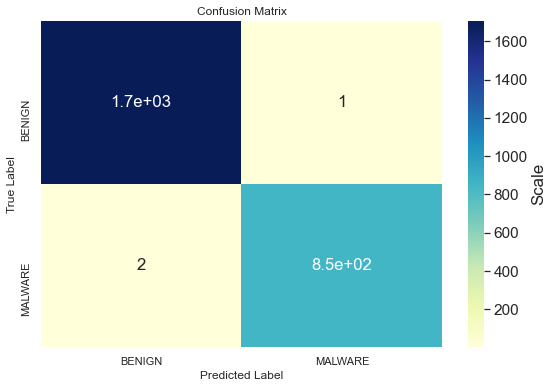

In [21]:
labels = ["BENIGN", "MALWARE"]
plot_confusion_matrix(conf, labels, "confusion_matrix.png")

## SVM [pca]

In [11]:
## Bagi dataset menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(
    pca_clean_dataset, pca_label, test_size=1/7.0, random_state=0
)

In [12]:
svm_classifier = SVC()
svm_classifier.fit(x_train, y_train)
scores = cross_val_score(estimator=svm_classifier, X=pca_clean_dataset, y=pca_label, cv=10, n_jobs=4)
print("mean: {:.3f} (std: {:.3f})".format(scores.mean(), scores.std()), end="\n\n" )

mean: 0.990 (std: 0.023)



In [13]:
y_pred = svm_classifier.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.998828125
